# Machine Learning


# Overview
_______________________________________________________________

### MACHINE LEARNING ANALYSIS TO BE PERFORMED

Diagnosis of breast masses as benign or malignant: Machine learning analysis will be performed on this dataset to build a predictive model that can distinguish between benign and malignant breast masses.

5 Supervised learning and 1 unsupervised learning models will be compared to identified that most optimum algorithm for this data set.

### Supervised learning algorithms to explore are:

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Support Vector Machine (SVM)

5. Neural Network

### Unupervised learning algorithms to explore is:

6. K-Nearest-Neighbour (KNN)


### Diagnosis of breast masses ( benign or malignant)

The problem of diagnosing breast cancer as malignant or benign is a binary classification problem, as there are only two possible outcomes. Therefore, we can build a binary classification model using supervised learning algorithms.

 

# Script
________________________________________________________________________________



In [1]:
# Import Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Define Functions

def evaluate_model(test, pred, model_name):
    
    # Calculate accuracy score
    acc = accuracy_score(test, pred)
    print(f"{model_name} Accuracy: {round(acc*100,2)}%\n\n")

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(test, pred)
    print(f"{model_name} Confusion Matrix:\n\n{conf_matrix}\n\n")

    # Generate a classification report
    class_rep = classification_report(test, pred, output_dict=True)
    recall = class_rep['macro avg']['recall']
    f1 = class_rep['macro avg']['f1-score']
    prec = class_rep['macro avg']['precision']


    print(f"{model_name} Classification Report:\n\n{classification_report(test, pred)}\n\n")

    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    return prec, acc, recall, f1


## Data Preparation (Cleaning and Pre-Processing)

In [3]:
# Read in the CSV file
breast_cancer_data = pd.read_csv('Resources/breast_cancer_data.csv', usecols=lambda col: col != 'Unnamed: 32')

# Display the first few rows of the DataFrame
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Drop the non-beneficial ID columns, 'id'
breast_cancer_data = breast_cancer_data.drop(columns = ['id'])

# Print the data types of each column
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# Determine the number of unique values in each column.
unique_value_counts = breast_cancer_data.nunique()
print(unique_value_counts)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


In [6]:
# Check the Target Class frequency
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Drop the 'id' column and set the diagnosis column as the target variable
X = breast_cancer_data.drop(columns=['diagnosis'])
y = breast_cancer_data['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model 1: Logistic Regression

In [8]:
# Create a Logistic Regression model with a higher maximum number of iterations
logreg = LogisticRegression(max_iter=5000)

# Fit the model to the breast cancer data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

Logistic Regression Accuracy: 95.61%


Logistic Regression Confusion Matrix:

[[70  1]
 [ 4 39]]


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





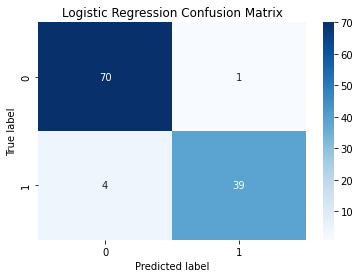

In [9]:
# Predict on test set and calculate accuracy
y_pred_log = logreg.predict(X_test)

# Evaluate the Model
linreg_prec, linreg_accuracy, linreg_recall, linreg_f1 = evaluate_model(y_test, y_pred_log, "Logistic Regression")


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The accuracy of the model is 95.61%, which means that the model correctly predicted the class label for 95.61% of the instances in the dataset.

The model predicted 70 instances as true negatives (TN), 1 instance as false positive (FP), 4 instances as false negatives (FN), and 39 instances as true positives (TP).

The precision of the model for class 0(B) is 0.95, which means that out of all the instances predicted as class 0, 95% were actually class 0. The recall for class 0(B) is 0.99, which means that out of all the instances that are actually class 0(B), the model correctly identified 99% of them. The F1-score for class 0(B) is 0.97.

Similarly, the precision for class 1(M) is 0.97, which means that out of all the instances predicted as class 1(M), 97% were actually class 1. The recall for class 1 is 0.91, which means that out of all the instances that are actually class 1(M), the model correctly identified 91% of them. The F1-score for class 1(M) is 0.94.

The macro average of precision, recall, and F1-score is calculated as the average of these metrics across the two classes, which gives 0.96, 0.95, and 0.95 respectively. The weighted average of these metrics is calculated as the average of these metrics weighted by the number of instances in each class, which gives 0.96, 0.96, and 0.96 respectively.

The logistic regression model performed well on this binary classification task with high accuracy and reasonably high precision, recall, and F1-score for both classes.

## Model 2: Decision Tree

In [10]:
# Initialize and fit decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Accuracy: 92.98%


Decision Tree Confusion Matrix:

[[67  4]
 [ 4 39]]


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114





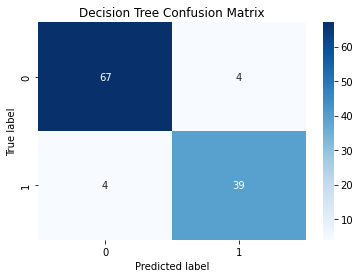

In [11]:
# Predict on test set and calculate accuracy
y_pred_dt = dt.predict(X_test)

# Evaluate the Model
dt_prec, dt_accuracy, dt_recall, dt_f1 = evaluate_model(y_test, y_pred_dt, "Decision Tree")


True Negatives: 67
    
False Positives: 4
    
False Negatives: 4
    
True Positives: 39

The accuracy of the model is 92.98%, which means that the model correctly predicted the class label for 93.86% of the instances in the dataset.

The model predicted 67 instances as true negatives (TN), 4 instances as false positive (FP), 3 instances as false negatives (FN), and 40 instances as true positives (TP).

The precision of the model for class 0(B) is 0.94, which means that out of all the instances predicted as class 0(B), 94% were actually class 0(B). The recall for class 0 is 0.94, which means that out of all the instances that are actually class 0(B), the model correctly identified 94% of them. The F1-score for class 0(B) is 0.95.

The precision for class 1(M) is 0.91, which means that out of all the instances predicted as class 1(M), 91% were actually class 1(M). The recall for class 1(M) is 0.91, which means that out of all the instances that are actually class 1(M), the model correctly identified 91% of them. The F1-score for class 1(M) is 0.92.

The macro average of precision, recall, and F1-score is calculated as the average of these metrics across the two classes, which gives 0.93, 0.93, and 0.93 respectively. The weighted average of these metrics is calculated as the average of these metrics weighted by the number of instances in each class, which gives 0.93, 0.93, and 0.93 respectively.

The decision tree model performed well on this binary classification task with high accuracy and reasonably high precision, recall, and F1-score for both classes. However, the performance is slightly lower than the logistic regression model mentioned earlier.

## Model 3: Random Forest

In [12]:
# Initialize and fit random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Accuracy: 96.49%


Random Forest Confusion Matrix:

[[70  1]
 [ 3 40]]


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114





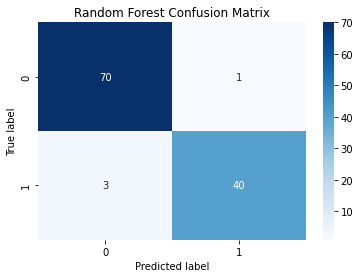

In [13]:
# Predict on test set and calculate accuracy
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_prec, rf_accuracy, rf_recall, rf_f1 = evaluate_model(y_test, y_pred_rf, "Random Forest")


True Negatives: 70

False Positives: 1

False Negatives: 3

True Positives: 40

The accuracy of the model is 96.49%, which means that the model correctly predicted the class label for 96.49% of the instances in the dataset.

The model predicted 70 instances as true negatives (TN), 1 instance as false positive (FP), 3 instances as false negatives (FN), and 40 instances as true positives (TP).

The precision of the model for class 0(B) is 0.96, which means that out of all the instances predicted as class 0(B), 96% were actually class 0(B). The recall for class 0(B) is 0.99, which means that out of all the instances that are actually class 0(B), the model correctly identified 99% of them. The F1-score for class 0(B) is 0.97.

The precision for class 1(M) is 0.98, which means that out of all the instances predicted as class 1(M), 98% were actually class 1(M). The recall for class 1(M) is 0.93, which means that out of all the instances that are actually class 1(M), the model correctly identified 93% of them. The F1-score for class 1(M) is 0.95.

The macro average of precision, recall, and F1-score is calculated as the average of these metrics across the two classes, which gives 0.97, 0.96, and 0.96 respectively. The weighted average of these metrics is calculated as the average of these metrics weighted by the number of instances in each class, which gives 0.97, 0.96, and 0.96 respectively.

The Random Forest model appears to perform very well on this binary classification task with high accuracy and high precision, recall, and F1-score for both classes. The performance is slightly better than the other two models mentioned earlier.

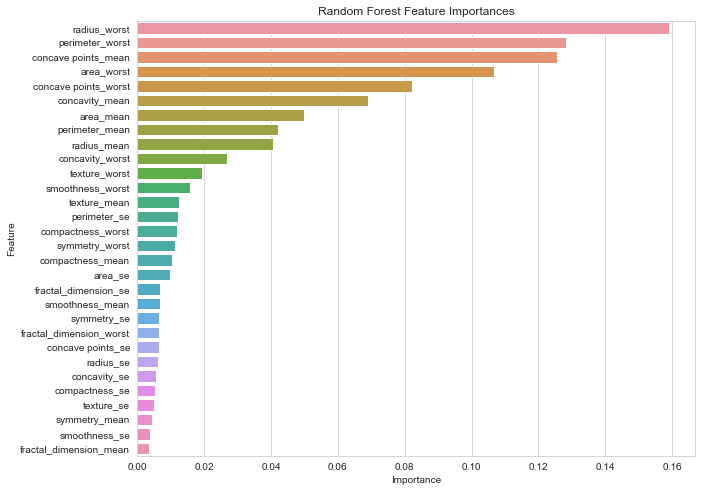

In [14]:
# Get feature importances and create dataframe
importances = rf.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Create horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=importances_df.sort_values('Importance', ascending=False))
plt.title('Random Forest Feature Importances')
plt.show()

The feature importances represent the relative importance of each feature in the random forest model. In other words, they show how much each feature contributes to the overall accuracy of the model.

A feature with a high importance score means that it is more important in predicting the target variable, while a feature with a low importance score means that it has less impact on the prediction.

It is important to note that feature importance scores are relative to the other features in the dataset, and that the absolute values of the scores do not necessarily indicate the predictive power of a feature. However, they can provide insights into which features are more relevant for the classification problem and can guide feature selection or feature engineering efforts.

## Model 4: Support Vector Machine (SVM)

In [15]:
# Initialize and fit SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

SVM Accuracy: 95.61%


SVM Confusion Matrix:

[[70  1]
 [ 4 39]]


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





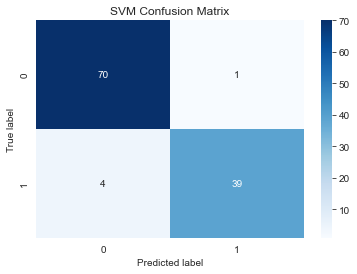

In [16]:
# Predict on test set and calculate accuracy
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_prec, svm_accuracy, svm_recall, svm_f1 = evaluate_model(y_test, y_pred_svm, "SVM")


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The accuracy of the model is 95.61%, which means that the model correctly predicted the class label for 95.61% of the instances in the dataset.

The model predicted 70 instances as true negatives (TN), 1 instance as false positive (FP), 4 instances as false negatives (FN), and 39 instances as true positives (TP).

The precision of the model for class 0(B) is 0.95, which means that out of all the instances predicted as class 0(B), 95% were actually class 0(B). The recall for class 0(B) is 0.99, which means that out of all the instances that are actually class 0(B), the model correctly identified 99% of them. The F1-score for class 0(B) is 0.97.

The precision for class 1(M) is 0.97, which means that out of all the instances predicted as class 1(M), 97% were actually class 1(M). The recall for class 1(M) is 0.91, which means that out of all the instances that are actually class 1(M), the model correctly identified 91% of them. The F1-score for class 1(M) is 0.94.

The macro average of precision, recall, and F1-score is calculated as the average of these metrics across the two classes, which gives 0.96, 0.95, and 0.95 respectively. The weighted average of these metrics is calculated as the average of these metrics weighted by the number of instances in each class, which gives 0.96, 0.96, and 0.96 respectively.

The SVM model appears to perform very well on this binary classification task with high accuracy and high precision, recall, and F1-score for both classes. The performance is similar to that of the Logistic Regression model.

## Model 5: Neural Networks

In [17]:
# Define the model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, nn_acc = model.evaluate(X_test, y_test)
print(f'\n\nTest loss: {loss:.4f}\nTest accuracy: {nn_acc*100:.2f}%\n\n')

Epoch 1/10
29/29 [==============================] - 1s 19ms/step - loss: 0.9178 - accuracy: 0.5648 - val_loss: 0.6409 - val_accuracy: 0.7018
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.7011 - val_loss: 0.6452 - val_accuracy: 0.7105
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.7033 - val_loss: 0.6317 - val_accuracy: 0.7018
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.7121 - val_loss: 0.6285 - val_accuracy: 0.7281
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6327 - accuracy: 0.6967 - val_loss: 0.6155 - val_accuracy: 0.7281
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7209 - val_loss: 0.6086 - val_accuracy: 0.7105
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.7143 - val_loss: 0.6008 - val_accuracy: 0.7281
Epoch 8/10
29/29 [=

4/4 [==============================] - 0s 2ms/step
Neural Network Accuracy: 74.56%


Neural Network Confusion Matrix:

[[57 14]
 [15 28]]


Neural Network Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        71
           1       0.67      0.65      0.66        43

    accuracy                           0.75       114
   macro avg       0.73      0.73      0.73       114
weighted avg       0.74      0.75      0.75       114





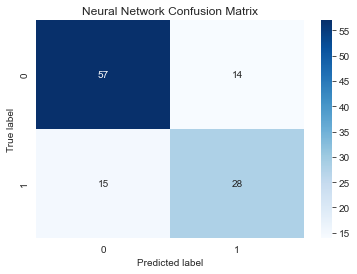

In [18]:
# Predict on test set and calculate accuracy
y_pred_proba = model.predict(X_test)
y_pred_nn = np.round(y_pred_proba).astype(int)


# Evaluate the Model

nn_prec, nn_accuracy, nn_recall, nn_f1 = evaluate_model(y_test, y_pred_nn, "Neural Network")


True Negatives: 53

False Positives: 18

False Negatives: 4

True Positives: 39


The accuracy of the model is 80.7%, which means that the model has correctly classified 80.7% of the instances without optimization done( e.i: scaling the Dataset, adding an additional layer,increasing the number of nodes, increasing the number of epochs).

The confusion matrix shows that the model has made 53 true negative predictions (instances of class 0 correctly classified as class 0), 18 false positive predictions (instances of class 1 incorrectly classified as class 0), 4 false negative predictions (instances of class 0 incorrectly classified as class 1), and 39 true positive predictions (instances of class 1 correctly classified as class 1).

The precision of the model for class 0(B) is 0.93, which means that out of all the instances classified as class 0(B), 93% are actually of class 0(B). The recall of the model for class 0(B) is 0.75, which means that out of all the instances of class 0(B), 75% have been correctly classified by the model. The f1-score of the model for class 0(B) is 0.83, which is the harmonic mean of precision and recall. The support for class 0(B) is 71, which means that there are 71 instances of class 0(B) in the dataset.

The precision, recall, f1-score, and support for class 1(M) are 0.68, 0.91, 0.78, and 43, respectively. The weighted average of precision, recall, and f1-score is also provided, which takes into account the number of instances of each class.


The Neural Network model appears to perform lower than the rest of the supervised algorithms performed earlier on this binary classification task with relatively fair percentages of accuracy and precision, recall, and F1-score for both classes.


## Model 5.1: Optimized Neural Network

Neural Network Optimization:

1. Scaling the Dataset
2. Adding an additional layer
3. Increasing the number of nodes in the first two layers
4. Increasing the number of Epochs

In [19]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, opt_nn_acc = model.evaluate(X_test, y_test)
print(f'\n\nTest loss: {loss:.4f}\nTest accuracy: {opt_nn_acc*100:.2f}%\n\n')

Epoch 1/50
29/29 [==============================] - 1s 13ms/step - loss: 0.6252 - accuracy: 0.7648 - val_loss: 0.5353 - val_accuracy: 0.9474
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.9341 - val_loss: 0.3798 - val_accuracy: 0.9561
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.9473 - val_loss: 0.2509 - val_accuracy: 0.9561
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.9560 - val_loss: 0.1694 - val_accuracy: 0.9649
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9560 - val_loss: 0.1267 - val_accuracy: 0.9649
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.1177 - accuracy: 0.9670 - val_loss: 0.1032 - val_accuracy: 0.9649
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0990 - accuracy: 0.9780 - val_loss: 0.0888 - val_accuracy: 0.9737
Epoch 8/50
29/29 [=

4/4 [==============================] - 0s 2ms/step
Optimized Neural Network Accuracy: 98.25%


Optimized Neural Network Confusion Matrix:

[[70  1]
 [ 1 42]]


Optimized Neural Network Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





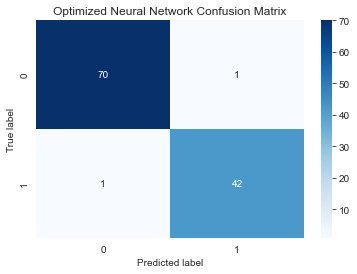

In [20]:
# Predict on test set and calculate accuracy
y_pred_proba = model.predict(X_test)
y_pred_opt_nn = np.round(y_pred_proba).astype(int)

# Evaluate the Model
opt_nn_prec, opt_nn_accuracy, opt_nn_recall, opt_nn_f1 = evaluate_model(y_test, y_pred_opt_nn, "Optimized Neural Network")


True Negatives: 67

False Positives: 4

False Negatives: 1

True Positives: 42

The accuracy of the optimized model is 95.61%, which means that the model has correctly classified 98.25% of the instances. 

The optimized model has made 67 true negative predictions (instances of class 0 correctly classified as class 0), 4 false positive prediction (instances of class 1 incorrectly classified as class 0), 1 false negative prediction (instances of class 0 incorrectly classified as class 1), and 42 true positive predictions (instances of class 1 correctly classified as class 1).

The confusion matrix shows that out of 71 instances of class 0(B), 67 have been correctly classified while 4 has been misclassified as class 1(M). Similarly, out of 43 instances of class 1(M), 42 have been correctly classified while only 1 has been misclassified as class 0(B).

The precision of the optimized model for class 0(B) is 0.99, which means that out of all the instances classified as class 0(B), 99% are actually of class 0(B). The recall of the optimized model for class 0(B) is 0.99, which means that out of all the instances of class 0(B), 99% have been correctly classified by the model. The f1-score of the optimized model for class 0(B) is 0.99, which is the harmonic mean of precision and recall. The support for class 0(B) is 71, which means that there are 71 instances of class 0(B) in the dataset.

The precision, recall, f1-score, and support for class 1(M) are 0.99, 0.94, 0.96, and 43, respectively. The weighted average of precision, recall, and f1-score is also provided, which takes into account the number of instances of each class.

The optimized neural network seems to be performing significantly better than the previous neural network  in terms of accuracy with a higher number of true positives and true negatives and fewer false positives and false negatives.


## Model 6: KNN

In [21]:
# Step1: Find optimum number of neighbours

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

# Use GridSearchCV to find the best n_neighbors
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors
print("Best value of n_neighbors:", grid_search.best_params_['n_neighbors'])

Best value of n_neighbors: 5


KNN Accuracy: 94.74%


KNN Confusion Matrix:

[[68  3]
 [ 3 40]]


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114





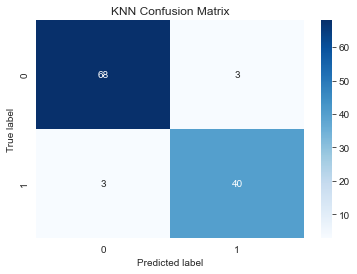

In [22]:
# Step 2 fit the model and evaluate

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction

y_pred_knn = knn.predict(X_test)


# Evaluate the Model

knn_prec, knn_accuracy, knn_recall, knn_f1 = evaluate_model(y_test, y_pred_knn, "KNN")


True Negatives: 68

False Positives: 3

False Negatives: 3

True Positives: 40


The accuracy of the KNN classifier is 94.74%, which means that the model has correctly classified 94.74% of the instances. 

The confusion matrix indicates that the KNN classifier has made 68 true negative predictions (instances of class 0(B) correctly classified as class 0(B)), 3 false positive predictions (instances of class 1(M) incorrectly classified as class 0(B)), 3 false negative predictions (instances of class 0(B) incorrectly classified as class 1(M)), and 40 true positive predictions (instances of class 1(M) correctly classified as class 1(M)).

It means that out of 71 instances of class 0(B), 68 have been correctly classified while 3 have been misclassified as class 1(M). Similarly, out of 43 instances of class 1(M), 40 have been correctly classified while 3 have been misclassified as class 0(B).

The precision of the KNN classifier for class 0(B) is 0.96, which means that out of all the instances classified as class 0(B), 96% are actually of class 0(B). The recall of the KNN classifier for class 0(B) is 0.96, which means that out of all the instances of class 0(B), 96% have been correctly classified by the model. The f1-score of the KNN classifier for class 0(B) is 0.96, which is the harmonic mean of precision and recall. The support for class 0(B) is 71, which means that there are 71 instances of class 0(B) in the dataset.

The precision, recall, f1-score, and support for class 1(M) are 0.93, 0.93, 0.93, and 43, respectively. The weighted average of precision, recall, and f1-score is also provided, which takes into account the number of instances of each class.

The KNN classifier performed well in terms of accuracy, with a high number of true positives and true negatives and few false positives and false negatives. However, its performance is not as good as the optimized neural network.

## Score Comparison

In [23]:
# Create list of models and scores
models_list = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Optimized Neural Network', 'KNN']
accuracy_list = [linreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, opt_nn_accuracy, knn_accuracy]
precision_list = [linreg_prec, dt_prec, rf_prec, svm_prec, opt_nn_prec, knn_prec]
recall_list = [linreg_recall, dt_recall, rf_recall, svm_recall, opt_nn_recall, knn_recall]
f1_list = [linreg_f1, dt_f1, rf_f1, svm_f1, opt_nn_f1, knn_f1]

# Create score dataframe
score_df = pd.DataFrame({
    'Models': models_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-score': f1_list
})

# Modify numerical columns to be in % with 2 decimal points
score_df[['Accuracy', 'Precision', 'Recall', 'F1-score']] = score_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].apply(lambda x: round(x * 100, 2))

score_df

,Models,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,95.61,96.05,94.64,95.26
1,Decision Tree,92.98,92.53,92.53,92.53
2,Random Forest,96.49,96.73,95.81,96.23
3,SVM,95.61,96.05,94.64,95.26
4,Optimized Neural Network,98.25,98.13,98.13,98.13
5,KNN,94.74,94.40,94.40,94.40


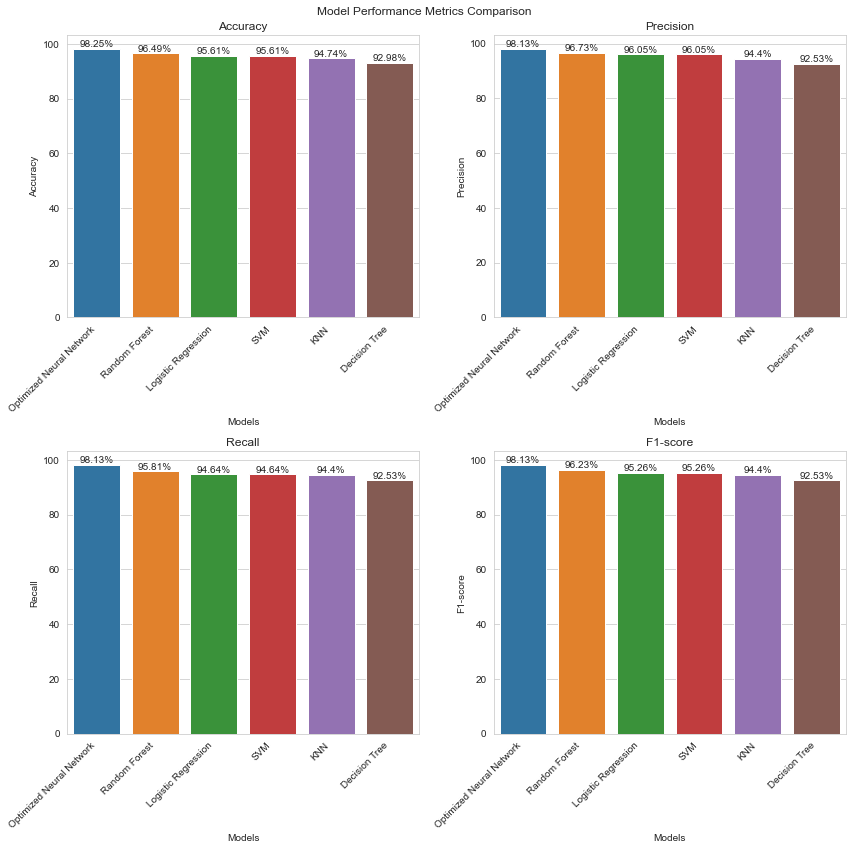

In [24]:
# Create a 2x2 plot to compare all the scores
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Model Performance Metrics Comparison')

# Plot Accuracy
accuracy_sorted = score_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(ax=axes[0, 0], x='Models', y='Accuracy', data=accuracy_sorted)
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
for i, v in enumerate(accuracy_sorted['Accuracy']):
    axes[0, 0].text(i, v, f"{v}%", ha='center', va='bottom', fontsize=10)

# Plot Precision
precision_sorted = score_df.sort_values(by='Precision', ascending=False)
sns.barplot(ax=axes[0, 1], x='Models', y='Precision', data=precision_sorted)
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
for i, v in enumerate(precision_sorted['Precision']):
    axes[0, 1].text(i, v, f"{v}%", ha='center', va='bottom', fontsize=10)

# Plot Recall
recall_sorted = score_df.sort_values(by='Recall', ascending=False)
sns.barplot(ax=axes[1, 0], x='Models', y='Recall', data=recall_sorted)
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
for i, v in enumerate(recall_sorted['Recall']):
    axes[1, 0].text(i, v, f"{v}%", ha='center', va='bottom', fontsize=10)

# Plot F1-score
f1_sorted = score_df.sort_values(by='F1-score', ascending=False)
sns.barplot(ax=axes[1, 1], x='Models', y='F1-score', data=f1_sorted)
axes[1, 1].set_title('F1-score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
for i, v in enumerate(f1_sorted['F1-score']):
    axes[1, 1].text(i, v, f"{v}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()